In [284]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import sklearn.tree as tree
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn import metrics
from subprocess import call
from IPython.display import Image
import warnings
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
warnings.filterwarnings('ignore')

## load data

In [285]:
df = pd.read_csv('titanic-passengers.csv',sep=';')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [286]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [287]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [288]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [289]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [290]:
df.dtypes

PassengerId      int64
Survived        object
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [291]:
df['Cabin'].value_counts()

G6             4
B96 B98        4
C23 C25 C27    4
F33            3
D              3
              ..
C91            1
D45            1
F G63          1
A34            1
E63            1
Name: Cabin, Length: 147, dtype: int64

In [292]:
df.loc[df['Cabin'].notnull(),'Cabin'] = 1
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,1,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,1,S


In [293]:
# cabin not mentioned 
df['Cabin'] = df['Cabin'].fillna(0)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,0,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,1,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,0,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,0,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,1,S


<AxesSubplot:xlabel='Age', ylabel='Count'>

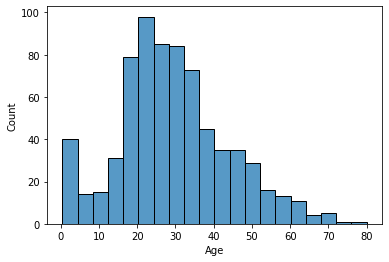

In [294]:
#distirbution of age 
import seaborn as sns
sns.histplot(data=df, x="Age")

In [295]:
#check average age of males and females 
ageMean = pd.DataFrame({'mean':df.groupby(by="Sex",axis=0)['Age'].mean()})
#df.Age.fillna(int(df.Age.mean()),inplace=True)
ageMean.loc['female','mean']
ageMean

,mean
Sex,
female,27.915709
male,30.726645


In [296]:
#fill missing values of females age with average age of females 
mask = df['Sex'] == 'female' 
df.loc[mask,'Age'] = df.loc[mask,'Age'].fillna(ageMean.loc['female','mean'])
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            124
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         2
dtype: int64

In [297]:
#fill missing values of males age with average age of males 
mask = df['Sex'] == 'male' 
df.loc[mask,'Age'] = df.loc[mask,'Age'].fillna(ageMean.loc['male','mean'])
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [298]:
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [299]:
df["Embarked"].fillna("S",inplace=True)

In [300]:
df["Embarked"].isnull().sum()

0

<AxesSubplot:xlabel='Age', ylabel='Count'>

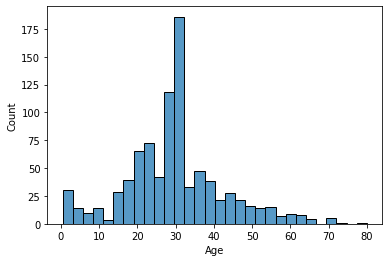

In [301]:
#distirbution of age 
import seaborn as sns
sns.histplot(data=df, x="Age")

<AxesSubplot:xlabel='Sex', ylabel='count'>

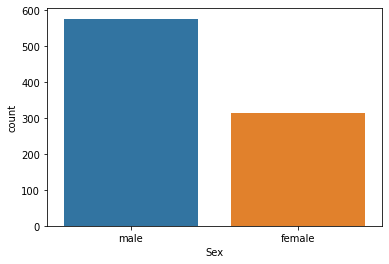

In [302]:
sns.countplot(x="Sex",data=df)

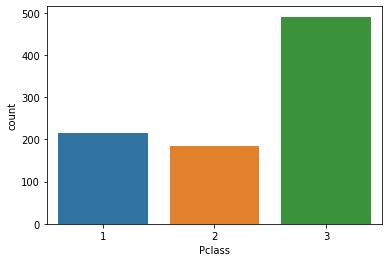

In [303]:
ax = sns.countplot(x="Pclass", data=df)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

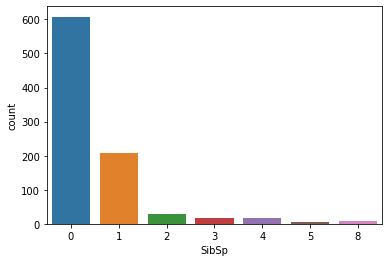

In [304]:
sns.countplot(x="SibSp",data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

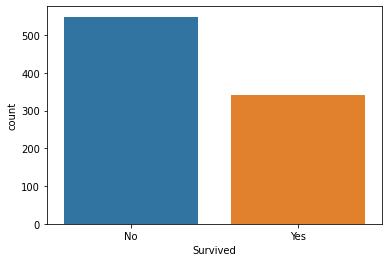

In [305]:
sns.countplot(x="Survived",data=df)

In [306]:
df["Sex"].value_counts()
df.loc[(df["Sex"]=="female") & (df["Survived"]=="Yes")]["Survived"].value_counts()
df.loc[(df["Sex"]=="male") & (df["Survived"]=="Yes")]["Survived"].value_counts()

Yes    109
Name: Survived, dtype: int64

#233 femlaes survived over 314==> 74% of females survived

#109 males survived over 577 ===> 19% 74% of males survived

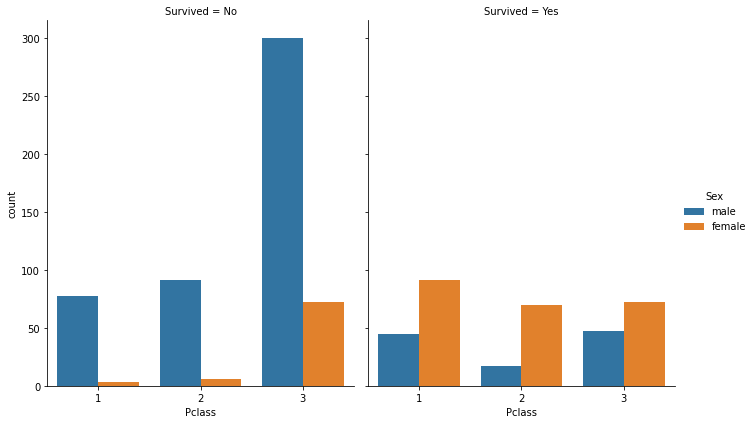

In [307]:
g = sns.catplot(x="Pclass", hue="Sex", col="Survived",
                data=df, kind="count",
                height=6, aspect=.8);

This graph shows the number of survivors by gender, looking at the number of men and women, we noticed that the number of men is higher than the number of women, but the number of women survivors is higher than the number of men. Women had a much better chance of survival, which may be due to the fact that they boarded the lifeboats first, regardless of their class, unlike men. out of 311 women on board, 339 survived. out of 843 men on board, only 161 survived.

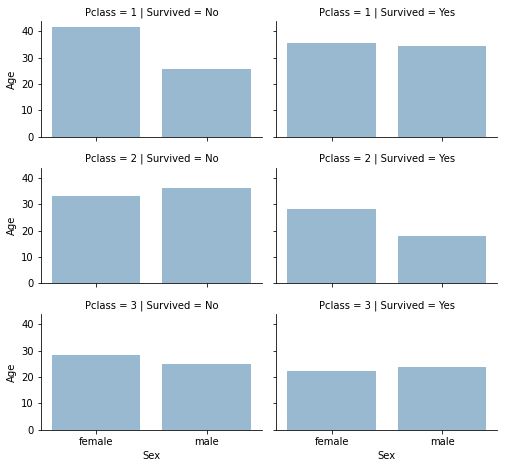

In [308]:
#check correlation between survived and pclass and sex 
grid = sns.FacetGrid(df, row='Pclass',col="Survived", size=2.2, aspect=1.6)
grid.map(sns.barplot  ,"Sex","Age", alpha=.5, ci=None)
grid.add_legend()

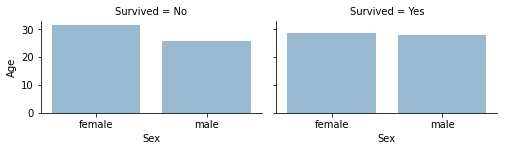

In [309]:
#correlation between age sex 
grid = sns.FacetGrid(df,col="Survived", size=2.2, aspect=1.6)
grid.map(sns.barplot  ,"Sex","Age", alpha=.5, ci=None)
grid.add_legend()

** males or females under 30 years old have better chance to survive

** females have better chance to survive

In [310]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

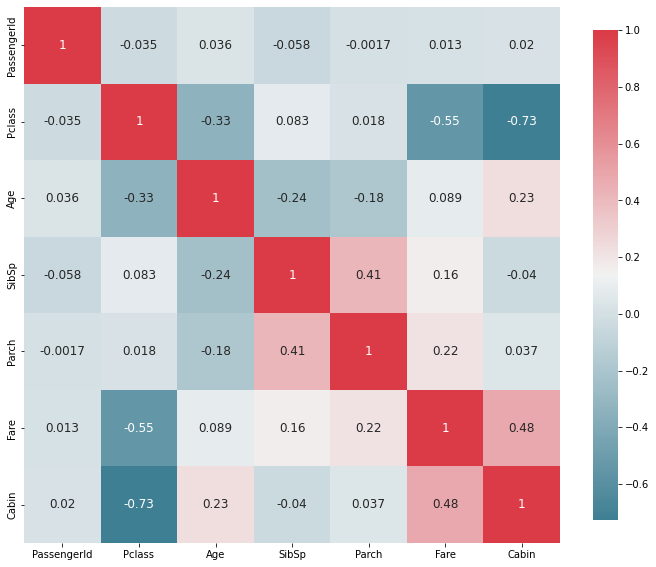

In [311]:
plot_correlation_map( df )

a heatmap denotes how changes between two variables relate. Two variables that change in the same direction are positively correlated. A change in opposite directions implies negative correlation. as we can see the correlation between titanic inputs have a low correlation the highest positive correlation in the inputs are between SibSp and Fare ;; and the highest negative correlation is between fare and pclass (each time the class number decreases the fare increases )

In [312]:
#use the groupby function combined with the mean() to view the relation between Pclass and survived 
df.groupby(by=["Survived","Pclass"]).mean()

PassengerId        Age     SibSp     Parch       Fare  \
Survived Pclass                                                          
No       1        410.300000  41.101579  0.287500  0.300000  64.684007   
         2        452.123711  33.341098  0.319588  0.144330  19.412328   
         3        453.580645  27.570785  0.672043  0.384409  13.669364   
Yes      1        491.772059  34.704372  0.492647  0.389706  95.608029   
         2        439.080460  26.058790  0.494253  0.643678  22.055700   
         3        394.058824  22.935735  0.436975  0.420168  13.694887   

                    Cabin  
Survived Pclass            
No       1       0.737500  
         2       0.030928  
         3       0.016129  
Yes      1       0.860294  
         2       0.149425  
         3       0.050420

In [313]:
df['Title'] = df['Name'].apply(lambda x : x.split(',')[1].split('.')[0].strip())


In [314]:
df.drop('Name', inplace=True, axis=1)

In [315]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,343,No,2,male,28.0,0,0,248740,13.0000,0,S,Mr
1,76,No,3,male,25.0,0,0,348123,7.6500,1,S,Mr
2,641,No,3,male,20.0,0,0,350050,7.8542,0,S,Mr
3,568,No,3,female,29.0,0,4,349909,21.0750,0,S,Mrs
4,672,No,1,male,31.0,1,0,F.C. 12750,52.0000,1,S,Mr


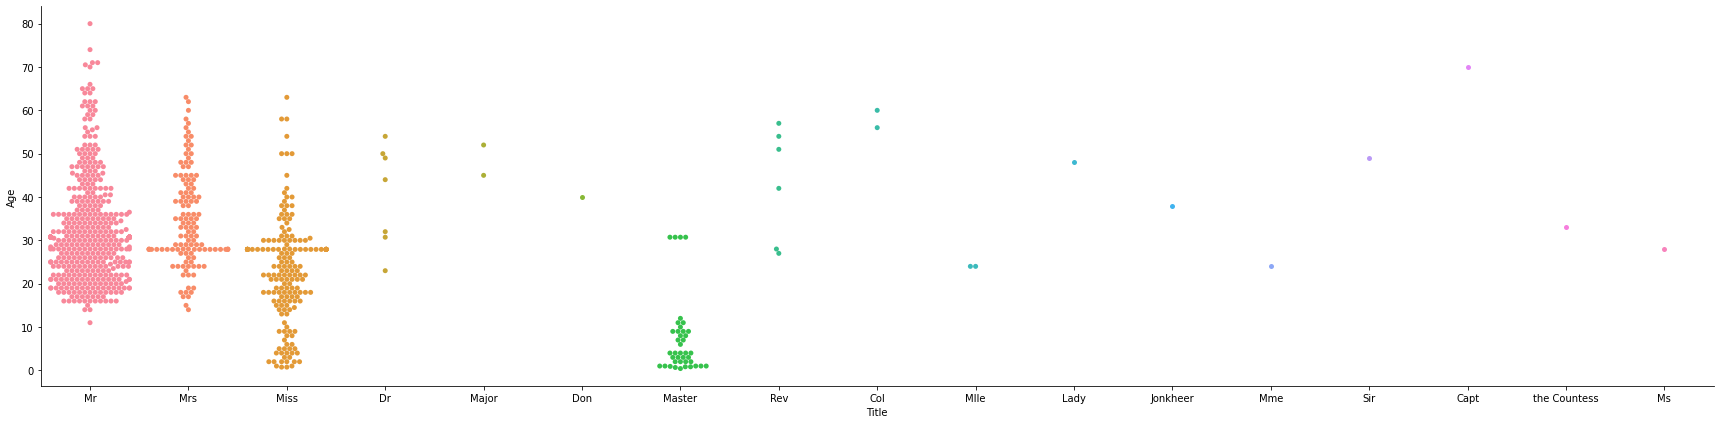

In [316]:
#coorelation between age and title
sns.catplot(x="Title", y="Age", kind="swarm", data=df,size=6,aspect=4,)


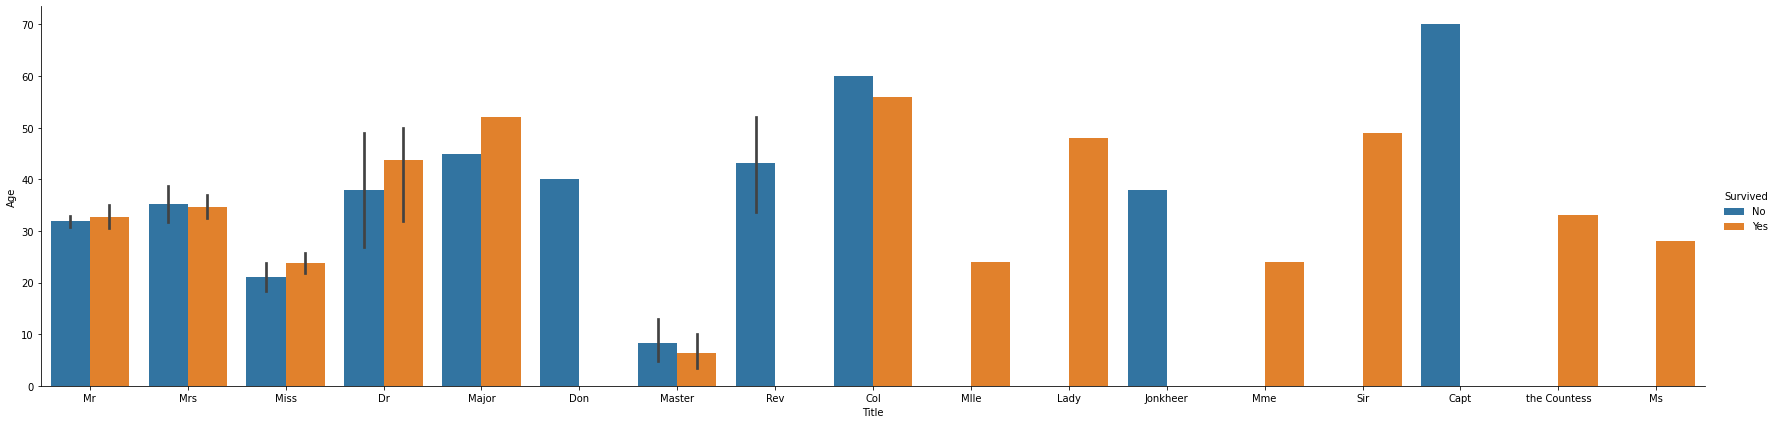

In [317]:
sns.catplot(x="Title", y="Age", hue="Survived", kind="bar", data=df,size=6,aspect=4)

In [318]:
Title_Dictionary = {

                    "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":         "Officer",

                    "Rev":        "Officer",

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty",

                  "the Countess": "Royalty",

                    "Dona":       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs",

                    "Master" :    "Master"

                    }

In [319]:
df['Title'].replace(Title_Dictionary,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,343,No,2,male,28.0,0,0,248740,13.0000,0,S,Mrs
1,76,No,3,male,25.0,0,0,348123,7.6500,1,S,Mrs
2,641,No,3,male,20.0,0,0,350050,7.8542,0,S,Mrs
3,568,No,3,female,29.0,0,4,349909,21.0750,0,S,Mrs
4,672,No,1,male,31.0,1,0,F.C. 12750,52.0000,1,S,Mrs


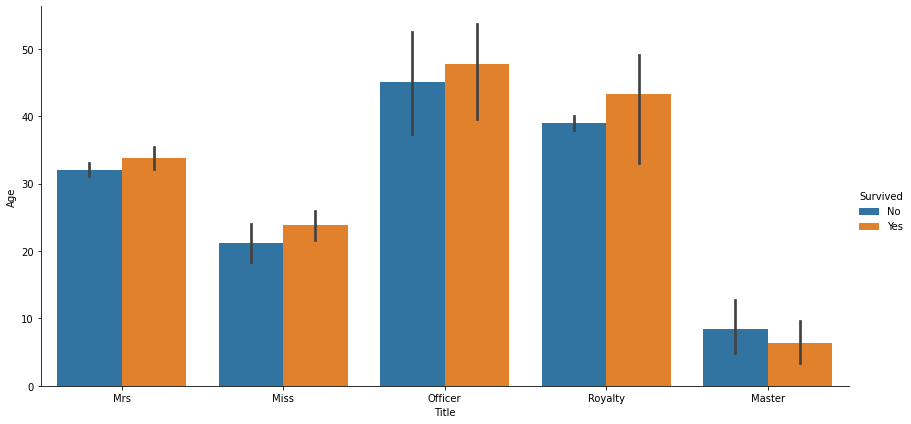

In [320]:
sns.catplot(x="Title", y="Age", hue="Survived", kind="bar", data=df,size=6,aspect=2)

In [321]:
 #Finally, use the Parch and the SibSp columns to create a more useful feature, let's call it FamilySize.
df['FamilySize'] = df["SibSp"] + df["Parch"]

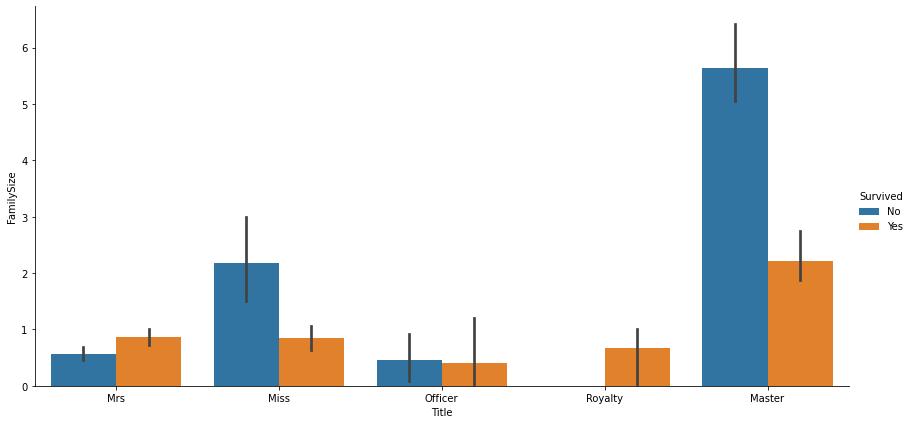

In [322]:
sns.catplot(x="Title", y="FamilySize", hue="Survived", kind="bar", data=df,size=6,aspect=2)

In [323]:
#drop the columns 
df.drop('SibSp',axis=1,inplace=True)
df.drop('Parch',axis=1,inplace=True)

this feature  is important cuz it shows that there is a correlation between Family size and survivals and their title.. as we can see in this graph   Masters have the highest number of familysize and they are more likely to not survive, and all the royality class who has family survived and those who has the title miss and have more than 2 memebrs of family are  more likely to not survive.   

In [324]:
# replacing Survived values with 1 and 0 
df.replace({"Survived":{"Yes":1,"No":0}}, inplace=True)

In [325]:
df.tail()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,FamilySize
886,10,1,2,female,14.000000,237736,30.0708,0,C,Mrs,1
887,61,0,3,male,22.000000,2669,7.2292,0,C,Mrs,0
888,535,0,3,female,30.000000,315084,8.6625,0,S,Miss,0
889,102,0,3,male,30.726645,349215,7.8958,0,S,Mrs,0
890,428,1,2,female,19.000000,250655,26.0000,0,S,Miss,0


In [326]:
#credit douaa 
def normalize (df):
    features= df.columns
    for column in features:
        mu = df[column].mean()
        sigma = df[column].std()
        df[column] = (df[column] - mu)/sigma


In [327]:

df.replace({'Sex':{'male': 1,'female':0}},inplace=True)
df.replace({'Embarked':{'S': 0,'C':1,'Q':2}},inplace=True)

In [328]:
# Select the features ? normalize

X = df.drop(['Survived','Fare','Ticket'], axis = 1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1234)
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

encoder=LabelEncoder()
X_train['Title'] = encoder.fit_transform(X_train["Title"])
X_test['Title'] = encoder.transform(X_test['Title'])


In [330]:
# Model 
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score =accuracy_score(y_test,y_pred) 
print(f'accuracy : {score}, F1_score: {f1_score(y_test, y_pred)}')

accuracy : 0.7723880597014925, F1_score: 0.7336244541484715


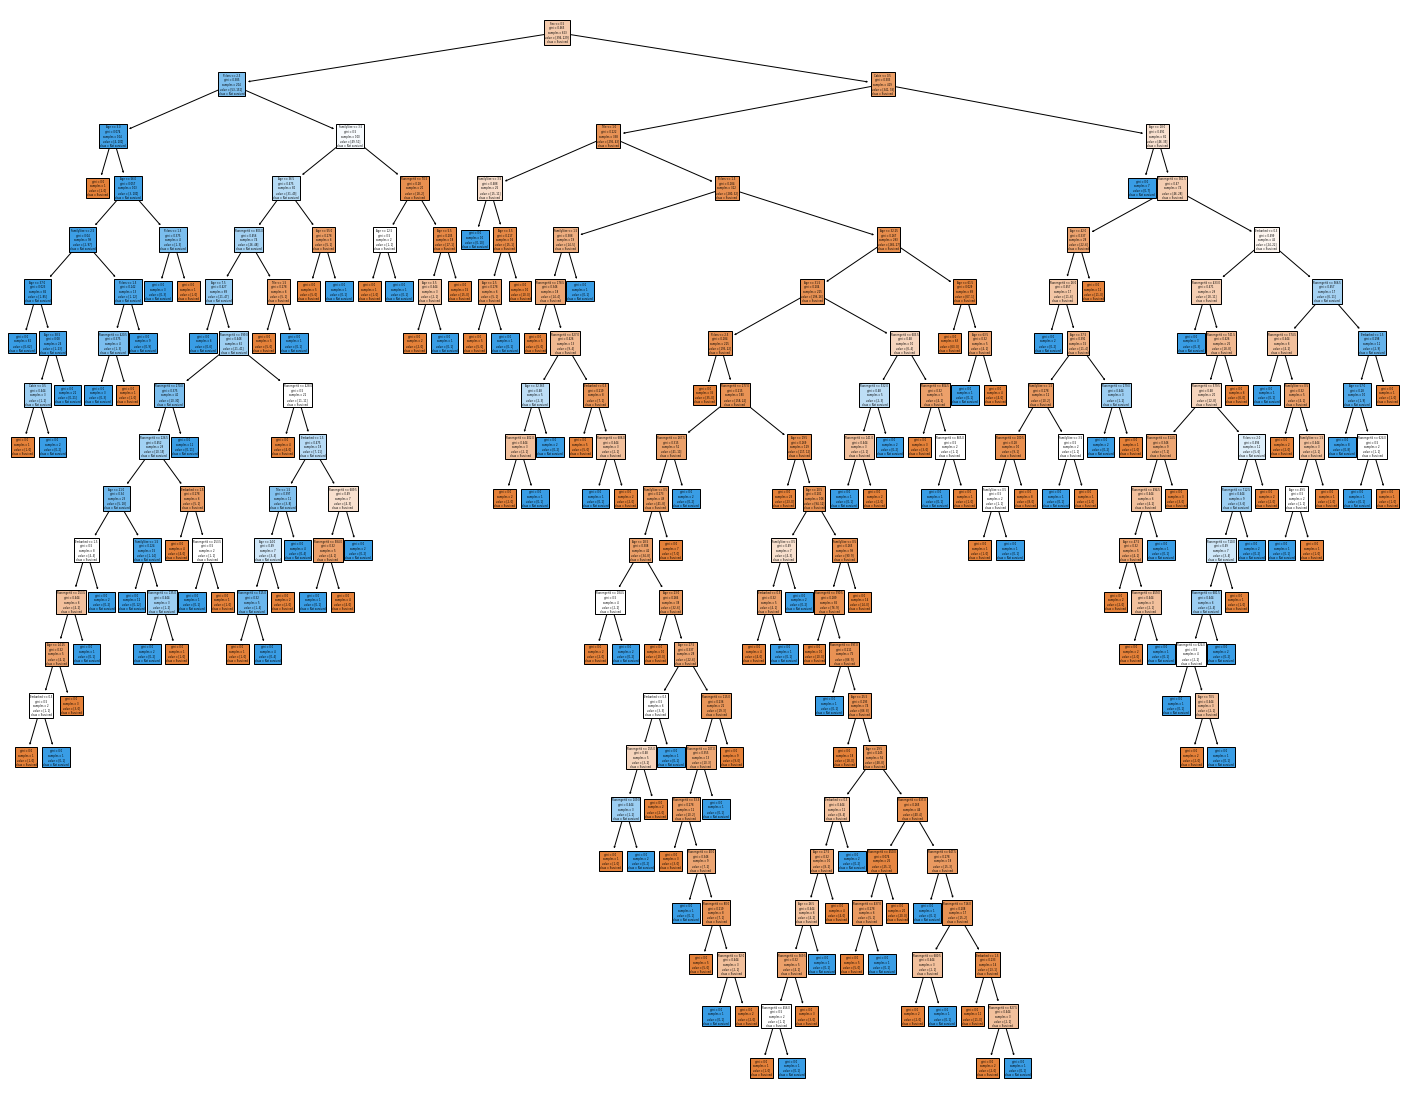

In [332]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, 
                   feature_names=X_train.columns,  
                   class_names=["Survived","Not survived"],
                   filled=True)

### TUNING MAX DEPTH

In [333]:
#function which makes prediction on given model and return auc score
def prediction_auc(X, y):
    y_pred=decisiontree.predict(X)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y, y_pred)
    result = auc(false_positive_rate, true_positive_rate)
    return result

#plotting results for train and test data depending on teste variable
def plotting(x, x_name, auc_train, auc_test):
    plt.plot(x, auc_train, label='train')    
    plt.plot(x, auc_test, label='test')
    plt.legend()
    plt.xlabel(x_name)
    plt.ylabel('AUC score')
    plt.show()

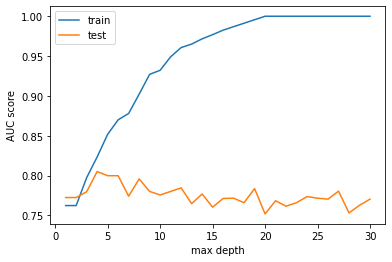

In [334]:
max_depths=range(1,31) #creating list of values to check

auc_train=[] #list to store results for train dataset 
auc_test=[] #list to store results for test dataset

#creating model and check result for each value of max depth
for max_depth in max_depths:
    decisiontree=DecisionTreeClassifier(max_depth=max_depth)
    decisiontree.fit(X_train,y_train)
    
    auc_tr=prediction_auc(X_train,y_train)
    auc_train.append(auc_tr)
    
    auc_tst=prediction_auc(X_test,y_test)
    auc_test.append(auc_tst)

#plotting results    
plotting(max_depths, 'max depth', auc_train, auc_test)

In [335]:
decisiontree_depth_4=DecisionTreeClassifier(max_depth=4)
decisiontree_depth_4.fit(X_train,y_train)
y_pred=decisiontree_depth_4.predict(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
result = auc(false_positive_rate, true_positive_rate)
print('AUC score: ', result)
print(f'accuracy : {accuracy_score(y_test,y_pred) }, F1_score: {f1_score(y_test, y_pred)}')

AUC score:  0.7842135312589208
accuracy : 0.7947761194029851, F1_score: 0.7465437788018434


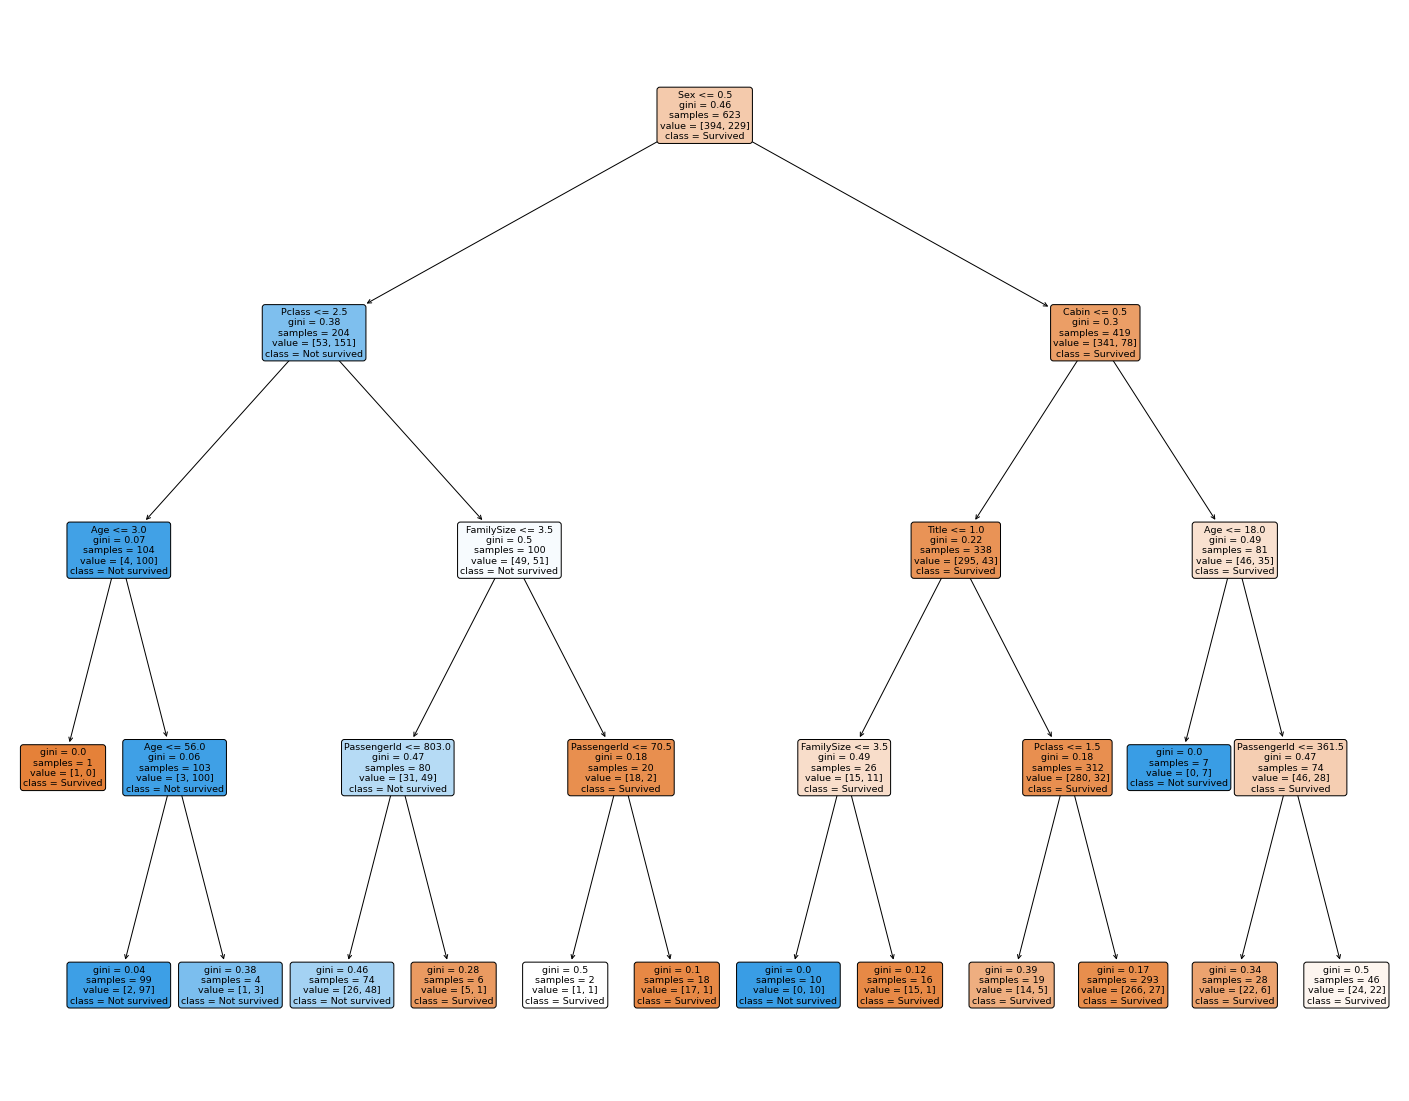

In [336]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(decisiontree_depth_4, 
                   feature_names=X_train.columns,  
                   class_names=["Survived","Not survived"],
                   filled=True,rounded = True, proportion = False, precision = 2)

#### TUNING MIN SAMPLES SPLIT
The min_samples_split parameter will evaluate the number of samples in the node, and if the number is less than the minimum the split will be avoided and the node will be a leaf.


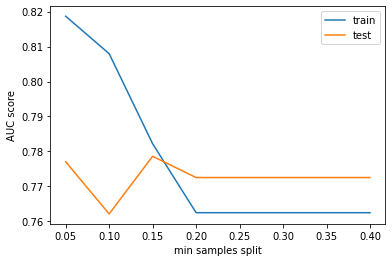

In [337]:
min_samples_splits=np.linspace(0.05,0.4,8) #creating list of values to check
auc_train=[] #list to store results for train dataset 
auc_test=[] #list to store results for test dataset

#creating model and check result for each value of min samples split
for min_samples_split in min_samples_splits:
    decisiontree=DecisionTreeClassifier(min_samples_split=min_samples_split)
    decisiontree.fit(X_train,y_train)
    auc_tr=prediction_auc(X_train,y_train)
    auc_train.append(auc_tr)
    
    auc_tst=prediction_auc(X_test,y_test)
    auc_test.append(auc_tst)

#plotting results    
plotting(min_samples_splits, 'min samples split', auc_train, auc_test)


In [338]:
#building tree with min samples split=0.1 and visualizing its structure
decisiontree_split_15=DecisionTreeClassifier(min_samples_split=0.15)
decisiontree_split_15.fit(X_train,y_train)
y_pred=decisiontree_split_15.predict(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
result = auc(false_positive_rate, true_positive_rate)
print('AUC score: ', result)
print(f'accuracy : {accuracy_score(y_test,y_pred) }\nF1_score: {f1_score(y_test, y_pred)}')

AUC score:  0.7785897801884099
accuracy : 0.7910447761194029
F1_score: 0.7383177570093459


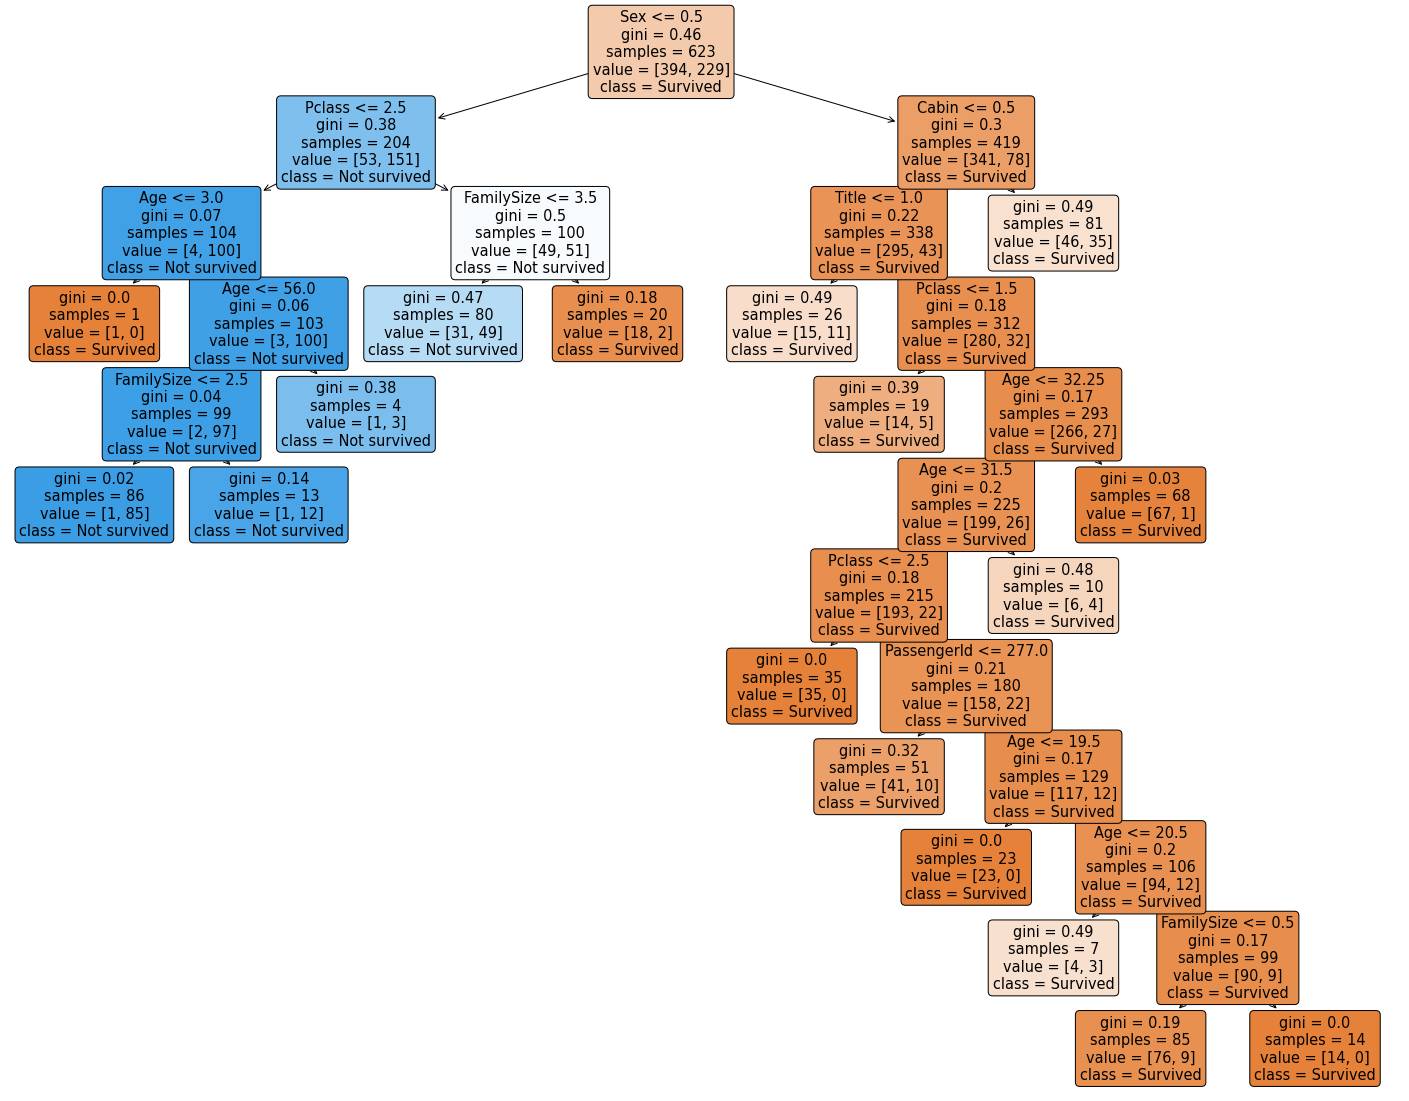

In [339]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(decisiontree_split_15, 
                   feature_names=X_train.columns,  
                   class_names=["Survived","Not survived"],
                   filled=True,rounded = True, proportion = False, precision = 2)

#### TUNING MIN SAMPLES LEAF
The min_samples_leaf parameter checks before the node is generated, that is, if the possible split results in a child with fewer samples, the split will be avoided (since the minimum number of samples for the child to be a leaf has not been reached) and the node will be replaced by a leaf.

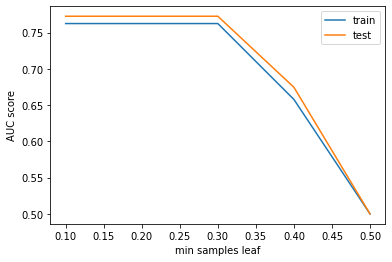

In [340]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True) #creating list of values to check
auc_train=[] #list to store results for train dataset 
auc_test=[] #list to store results for test dataset

#creating model and check result for each value of min samples leaf
for min_samples_leaf in min_samples_leafs:
    decisiontree=DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
    decisiontree.fit(X_train,y_train)
    auc_tr=prediction_auc(X_train,y_train)
    auc_train.append(auc_tr)
    
    auc_tst=prediction_auc(X_test,y_test)
    auc_test.append(auc_tst)
#plotting results    
plotting(min_samples_leafs, 'min samples leaf', auc_train, auc_test)

In [341]:
#building tree with min samples leaf=0.2 and visualizing its structure
decisiontree_leaf_02=DecisionTreeClassifier(min_samples_leaf=0.3)
decisiontree_leaf_02.fit(X_train,y_train)
y_pred=decisiontree_leaf_02.predict(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
result = auc(false_positive_rate, true_positive_rate)
print('AUC score: ', result)
print(f'accuracy : {accuracy_score(y_test,y_pred) }\nF1_score: {f1_score(y_test, y_pred)}')

AUC score:  0.7725092777619184
accuracy : 0.7798507462686567
F1_score: 0.73542600896861


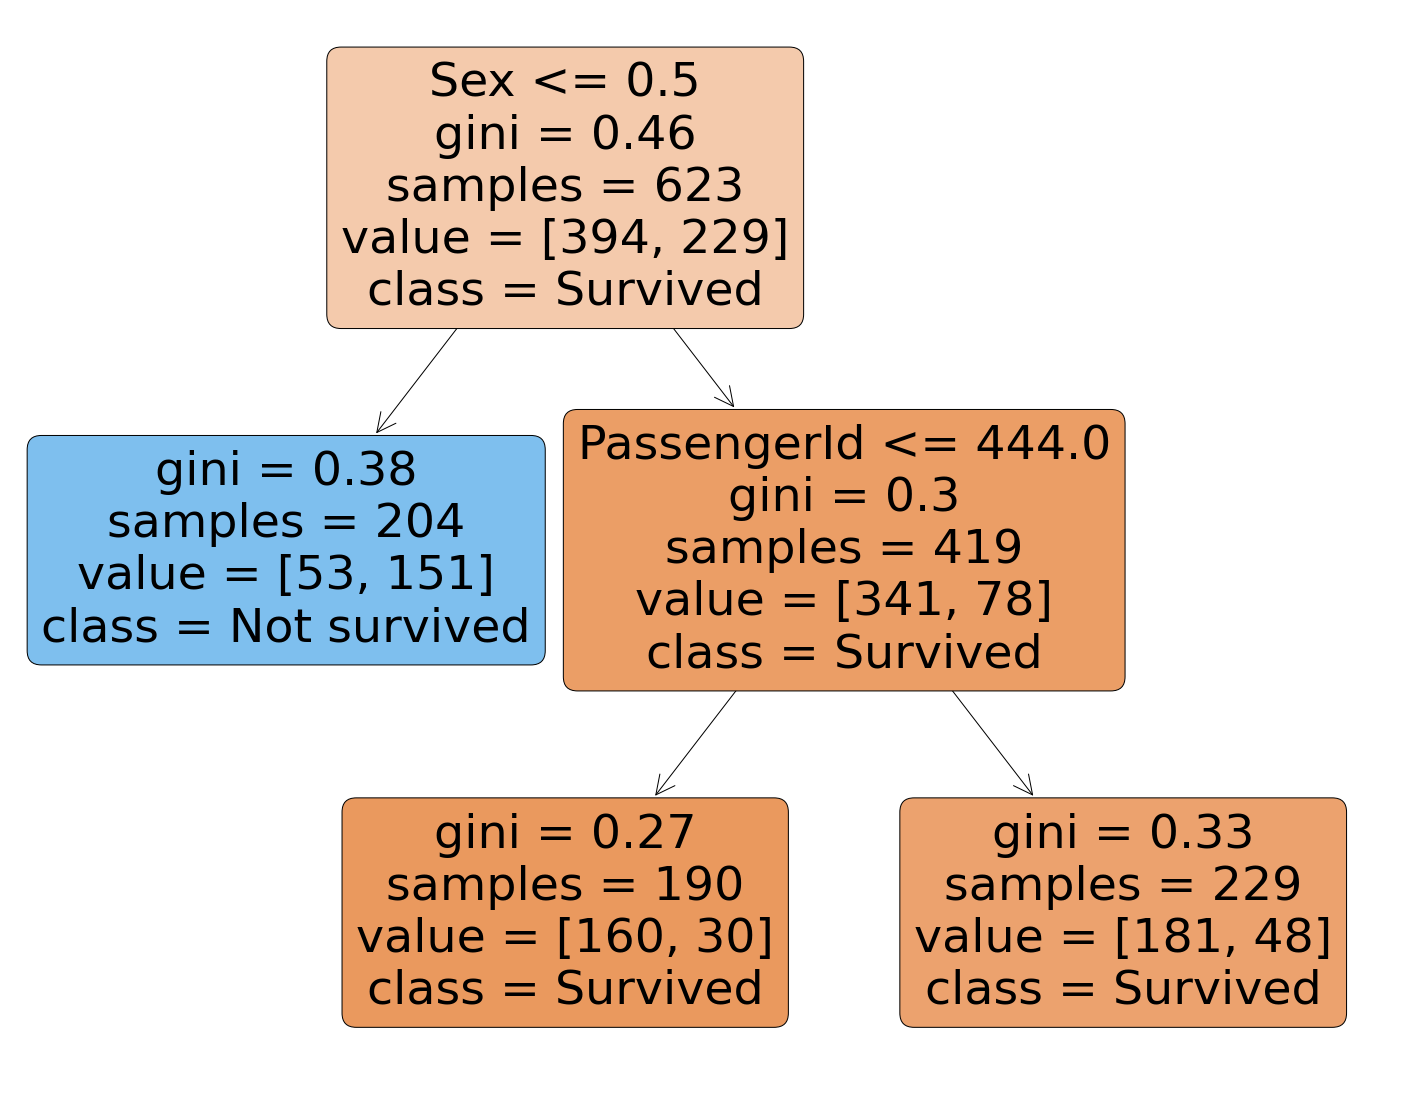

In [342]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(decisiontree_leaf_02, 
                   feature_names=X_train.columns,  
                   class_names=["Survived","Not survived"],
                   filled=True,rounded = True, proportion = False, precision = 2)

In [343]:
decisiontree_tuning=DecisionTreeClassifier(min_samples_leaf=0.3,min_samples_split=0.15,max_depth=4)
decisiontree_tuning.fit(X_train,y_train)
y_pred=decisiontree_tuning.predict(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
result = auc(false_positive_rate, true_positive_rate)
print('AUC score: ', result)
print(f'accuracy : {accuracy_score(y_test,y_pred) }\nF1_score: {f1_score(y_test, y_pred)}')

AUC score:  0.7725092777619184
accuracy : 0.7798507462686567
F1_score: 0.73542600896861


### GridSearch

In [344]:
max_depths=range(1,31)
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
min_samples_splits=np.linspace(0.05,0.4,8)
decisiontree  = DecisionTreeClassifier()
param_grid = {'min_samples_leaf' : min_samples_leafs,
              'min_samples_split':min_samples_splits,
              'max_depth':max_depths}
rf_cv = GridSearchCV(decisiontree, param_grid=param_grid, cv=5) #performing gridsearchcv
rf_cv.fit(X_train, y_train)
print('Best estimator', rf_cv.best_params_)

Best estimator {'max_depth': 1, 'min_samples_leaf': 0.1, 'min_samples_split': 0.05}


In [346]:
decisiontree_grid=DecisionTreeClassifier(min_samples_leaf=0.1,min_samples_split=0.05,max_depth=1)
decisiontree_grid.fit(X_train,y_train)
y_pred=decisiontree_grid.predict(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
result = auc(false_positive_rate, true_positive_rate)
print('AUC score: ', result)
print(f'accuracy : {accuracy_score(y_test,y_pred) }\nF1_score: {f1_score(y_test, y_pred)}')

AUC score:  0.7725092777619184
accuracy : 0.7798507462686567
F1_score: 0.73542600896861


## Random Forest

In [222]:
randomforest=RandomForestClassifier()
randomforest.fit(X_train,y_train)
y_pred=randomforest.predict(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
result = auc(false_positive_rate, true_positive_rate)
print('AUC score: ', result)
print(f'accuracy : {accuracy_score(y_test,y_pred) }\nF1_score: {f1_score(y_test, y_pred)}')

AUC score:  0.780987724807308
accuracy : 0.7910447761194029
F1_score: 0.743119266055046


#### tuning parameters 
* n_estimators = number of trees in the foreset


* max_features = max number of features considered for splitting a node


* max_depth = max number of levels in each decision tree


* min_samples_split = min number of data points placed in a node before the node is split


* min_samples_leaf = min number of data points allowed in a leaf node

* bootstrap = method for sampling data points (with or without replacement)

In [358]:
#n_estimators
randomforest=RandomForestClassifier() #initializing model
ne = np.arange(100,1000,100) 
param_grid = {'n_estimators' : ne} #parameters grid

rf_cv = GridSearchCV(randomforest, param_grid=param_grid, cv=5) #performing gridsearchcv
rf_cv.fit(X_train, y_train)
print('Best estimator', rf_cv.best_params_)

Best estimator {'n_estimators': 500}


In [357]:
randomforest=RandomForestClassifier(n_estimators= 500)
randomforest.fit(X_train,y_train)
y_pred=randomforest.predict(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
result = auc(false_positive_rate, true_positive_rate)
print('AUC score: ', result)
print(f'accuracy : {accuracy_score(y_test,y_pred) }\nF1_score: {f1_score(y_test, y_pred)}')

AUC score:  0.8075363973736798
accuracy : 0.8134328358208955
F1_score: 0.7767857142857142


In [362]:
min_samples_split = np.arange(10,100,10) 
min_samples_leaf = np.arange(10,100,10) 
random_grid = { 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               }
rf_cv = GridSearchCV(randomforest, param_grid=random_grid, cv=5)
rf_cv.fit(X_train, y_train)
print('Best estimator', rf_cv.best_params_)

Best estimator {'min_samples_leaf': 10, 'min_samples_split': 40}


In [364]:
randomforest=RandomForestClassifier(min_samples_leaf= 10, min_samples_split= 40,n_estimators= 500)
randomforest.fit(X_train,y_train)
y_pred=randomforest.predict(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
result = auc(false_positive_rate, true_positive_rate)
print('AUC score: ', result)
print(f'accuracy : {accuracy_score(y_test,y_pred) }\nF1_score: {f1_score(y_test, y_pred)}')

AUC score:  0.8031116186126177
accuracy : 0.8097014925373134
F1_score: 0.7713004484304933


In [372]:
# Number of trees in random forest
randomforest=RandomForestClassifier()
n_estimators = np.arange(100,1000,100) 
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = np.arange(1,20)
min_samples_split = np.arange(10,100,10) 
min_samples_leaf = np.arange(10,100,10) 
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rf_cv = GridSearchCV(randomforest, param_grid=param_grid, cv=5)
rf_cv.fit(X_train, y_train)
print('Best estimator', rf_cv.best_params_)

Best estimator {'n_estimators': 600}


In [378]:
randomforest_tuning = RandomForestClassifier(n_estimators =  600, random_state =  1234)
randomforest_tuning.fit(X_train,y_train)
y_pred=randomforest_tuning.predict(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
result = auc(false_positive_rate, true_positive_rate)
print('AUC score: ', result)
print(f'accuracy : {accuracy_score(y_test,y_pred) }\nF1_score: {f1_score(y_test, y_pred)}')

AUC score:  0.8075363973736798
accuracy : 0.8134328358208955
F1_score: 0.7767857142857142
